<a href="https://colab.research.google.com/github/divyasree321/ACPL/blob/main/ML_Workshop25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Load Dataset**


In [1]:
import pandas as pd

df = pd.read_csv('star_classification.csv')

In [2]:
df.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

## **Exploratory Data Analysis (EDA)**
Performing initial exploratory data analysis (EDA) to understand the dataset's structure, identify data types, check for missing values, and visualise key features. This will include creating relevant plots to understand the distribution of features.


In [4]:
df.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.576661,5137.009660,55588.647500,449.312740
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


In [5]:
df['class'].value_counts()

,count
class,
GALAXY,59445
STAR,21594
QSO,18961


### **Histogram Plots**

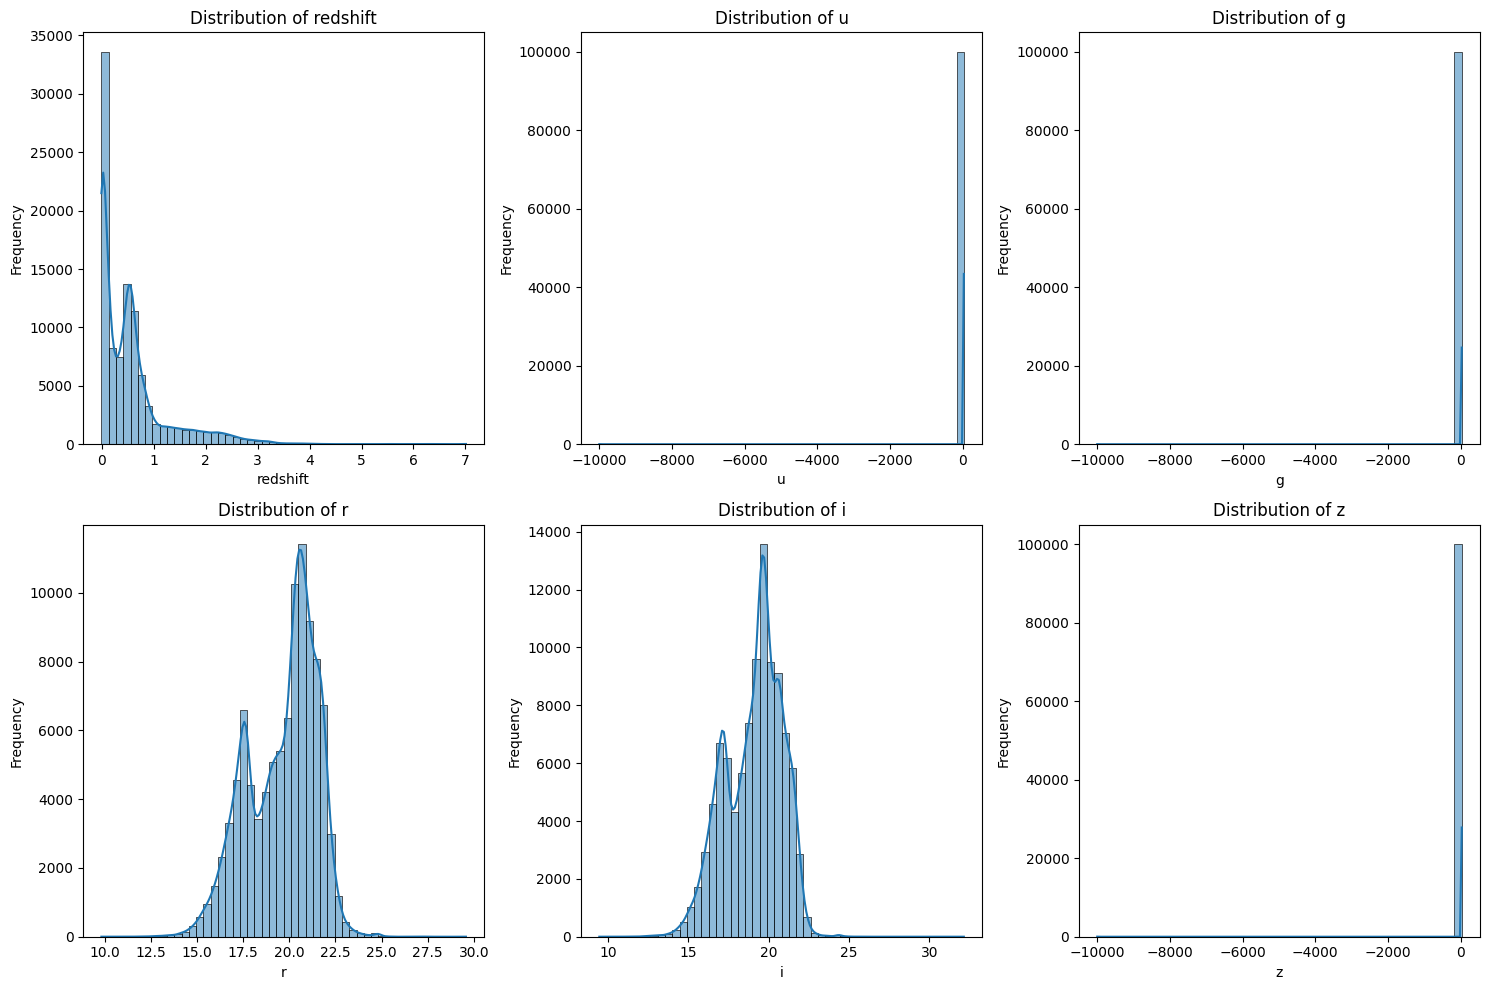

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

selected_features = ['redshift', 'u', 'g', 'r', 'i', 'z']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(selected_features):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[feature], kde=True, bins=50)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

### **Correlation Matrix**

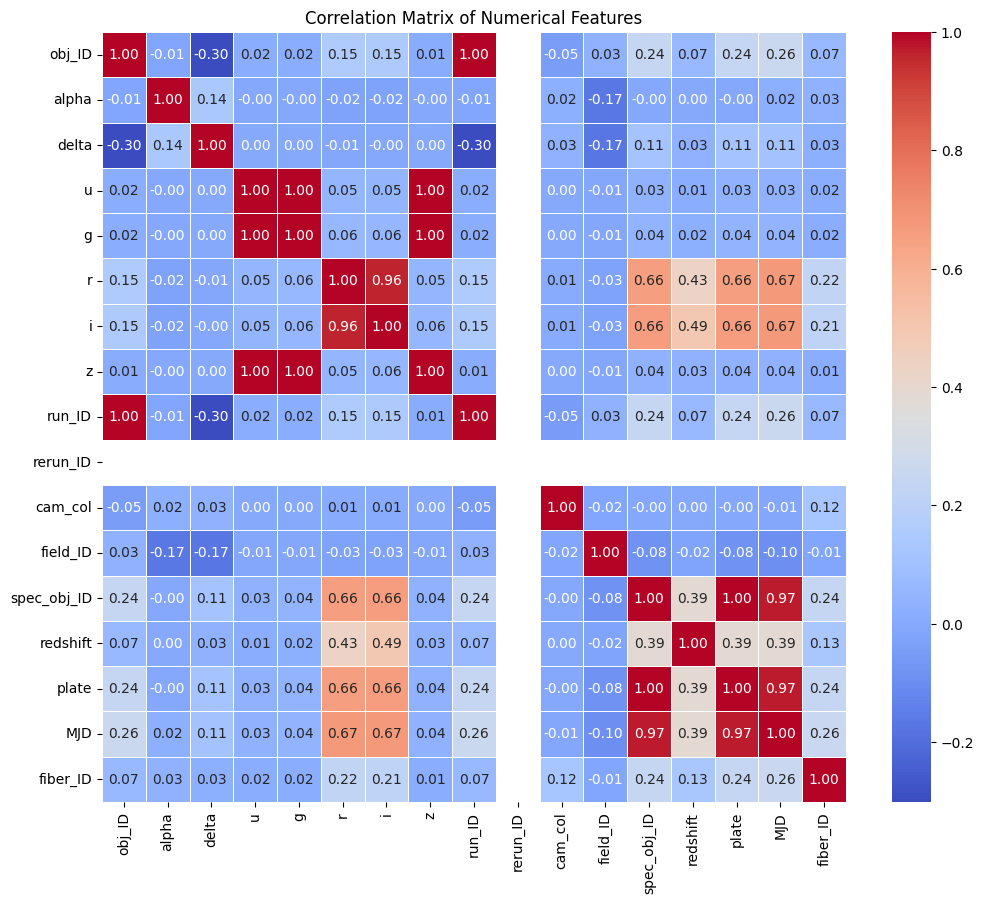

In [7]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, fmt='.2f', cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

### **Checking Null Values**

In [8]:
df.isnull().sum()

,0
obj_ID,0
alpha,0
delta,0
u,0
g,0
r,0
i,0
z,0
run_ID,0
rerun_ID,0


## **Data Preprocessing: Train-Test Split and Encoding**
Splitting the dataset into training and testing sets and encoding the target column.


In [9]:
columns_to_drop = ['obj_ID', 'rerun_ID', 'spec_obj_ID']
df_processed = df.drop(columns=columns_to_drop)

print(f"Dropped columns: {columns_to_drop}")
print("DataFrame after dropping columns:")
df_processed.head()

Dropped columns: ['obj_ID', 'rerun_ID', 'spec_obj_ID']
DataFrame after dropping columns:


,alpha,delta,u,g,r,i,z,run_ID,cam_col,field_ID,class,redshift,plate,MJD,fiber_ID
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,2,79,GALAXY,0.634794,5812,56354,171
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,5,119,GALAXY,0.779136,10445,58158,427
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,2,120,GALAXY,0.644195,4576,55592,299
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,3,214,GALAXY,0.932346,9149,58039,775
4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,3,137,GALAXY,0.116123,6121,56187,842


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Separate features (X) and target (y)
X = df_processed.drop('class', axis=1)
y = df_processed['class']

# Encode the target variable 'y'
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

print("Features (X) shape:", X.shape)
print("Target (y) shape:", y.shape)
print("Encoded target (y_encoded) shape:", y_encoded.shape)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)
print("\nClasses encoded as:", list(label_encoder.classes_))
print("Corresponding numerical labels:", list(range(len(label_encoder.classes_))))

Features (X) shape: (100000, 14)
Target (y) shape: (100000,)
Encoded target (y_encoded) shape: (100000,)
X_train shape: (80000, 14)
X_test shape: (20000, 14)
y_train shape: (80000,)
y_test shape: (20000,)

Classes encoded as: ['GALAXY', 'QSO', 'STAR']
Corresponding numerical labels: [0, 1, 2]


## **Data Preprocessing: Outlier Handling and Scaling**
To identify and handle outliers specifically within the training data before applying any scaling. Then, to apply feature scaling to numerical features in both the training and testing sets, fitting the scaler only on the training data.


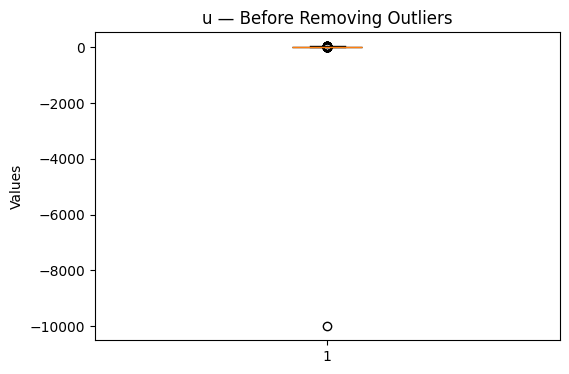

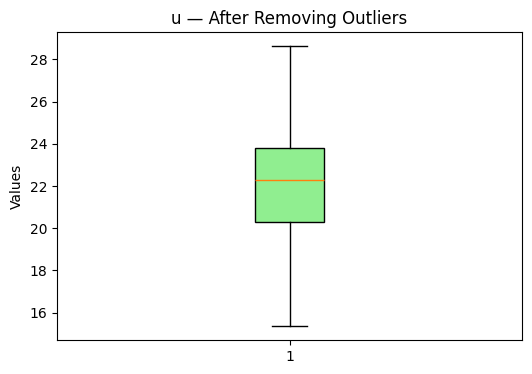

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

X_train_df = pd.DataFrame(X_train)
col = "u"

plt.figure(figsize=(6, 4))
plt.boxplot(X_train_df[col], patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title(f"{col} — Before Removing Outliers")
plt.ylabel("Values")
plt.show()

def remove_outliers_iqr(dataframe):
    Q1 = dataframe.quantile(0.25)
    Q3 = dataframe.quantile(0.75)
    IQR = Q3 - Q1
    mask = ~((dataframe < (Q1 - 1.5 * IQR)) | (dataframe > (Q3 + 1.5 * IQR))).any(axis=1)
    return dataframe[mask], mask

X_train, mask = remove_outliers_iqr(X_train_df)
y_train = y_train[mask]

plt.figure(figsize=(6, 4))
plt.boxplot(X_train[col], patch_artist=True, boxprops=dict(facecolor='lightgreen'))
plt.title(f"{col} — After Removing Outliers")
plt.ylabel("Values")
plt.show()

### **Scaling**

In [12]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# Initialise StandardScaler
scaler = StandardScaler()

# Fit the scaler only on X_train and transform both X_train and X_test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert scaled arrays back to DataFrames, preserving column names
X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

In [13]:
X_train.head()

,alpha,delta,u,g,r,i,z,run_ID,cam_col,field_ID,redshift,plate,MJD,fiber_ID
75220,-0.259186,0.751321,0.083088,0.372838,0.511160,0.388008,0.418756,-0.387457,1.558206,-0.088907,0.671201,-0.165213,0.019721,-1.470740
48955,-1.570841,0.427180,1.620215,1.726649,1.033551,0.828092,0.442280,1.692640,0.929632,-0.425355,1.065311,0.916774,1.446505,1.173059
44966,-0.376702,-0.399545,0.215823,0.380761,-0.007900,-0.047346,-0.134690,0.367133,-0.956092,-0.694514,0.016889,0.092240,0.258815,0.200966
13568,-0.262351,0.507437,-0.814674,-1.001419,-1.064208,-1.039895,-1.034925,0.027848,1.558206,0.180252,-0.739425,-1.054536,-1.210783,-1.404461
86979,0.456985,0.951019,0.247384,-0.103267,-0.413262,-0.482479,-0.487693,-0.407865,0.929632,-0.732965,-0.273223,-1.280959,-1.557193,0.046315


In [14]:
X_test.head()

,alpha,delta,u,g,r,i,z,run_ID,cam_col,field_ID,redshift,plate,MJD,fiber_ID
75721,-1.698286,-1.071872,0.523875,0.636593,0.494216,0.374114,0.292262,1.657436,1.558206,2.708424,0.277906,-0.250463,-0.013085,0.186237
80184,0.626630,-0.945256,-1.858621,-1.836150,-1.682939,-1.539842,-1.382249,-0.290518,-1.584666,0.795473,-1.017172,-0.979176,-0.512960,-0.355042
19864,-1.553123,-1.196931,-1.715552,-1.787066,-1.687453,-1.576427,-1.424949,1.659987,-1.584666,3.612029,-1.018044,0.779352,0.638587,1.835850
76699,0.705110,-0.703341,1.248051,0.521851,1.026210,1.363305,1.551639,0.438561,-1.584666,-0.252324,-1.018800,-0.334348,-0.050340,-0.436050
92991,-1.678074,-1.525177,0.711452,0.562753,0.609182,0.740796,0.784142,1.743660,-0.327517,-0.117745,-1.018403,0.977812,0.998897,-0.299809


## **Data Preprocessing: SMOTE Application**
To apply SMOTE (Synthetic Minority Over-sampling Technique) exclusively to the training data to address any class imbalance.

In [15]:
from imblearn.over_sampling import SMOTE

# Instantiate SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Shape of original X_train:", X_train.shape)
print("Shape of resampled X_train_resampled:", X_train_resampled.shape)
print("Shape of original y_train:", y_train.shape)
print("Shape of resampled y_train_resampled:", y_train_resampled.shape)

print("\nValue counts of original y_train:")
print(pd.Series(y_train).value_counts())
print("\nValue counts of resampled y_train_resampled:")
print(pd.Series(y_train_resampled).value_counts())

Shape of original X_train: (68512, 14)
Shape of resampled X_train_resampled: (133581, 14)
Shape of original y_train: (68512,)
Shape of resampled y_train_resampled: (133581,)

Value counts of original y_train:
0    44527
2    16307
1     7678
Name: count, dtype: int64

Value counts of resampled y_train_resampled:
0    44527
1    44527
2    44527
Name: count, dtype: int64


## **Decision Trees**

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

Decision Tree Classifier Performance:
Accuracy: 0.9516
Precision: 0.9530
Recall: 0.9516
F1-score: 0.9521


<Figure size 800x600 with 0 Axes>

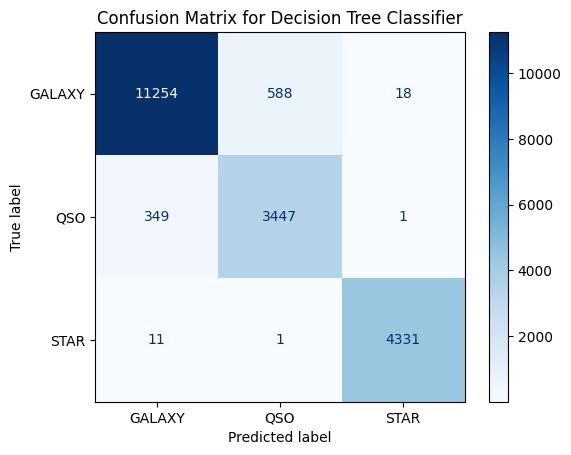

In [17]:
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_resampled, y_train_resampled)
y_pred_dt = dt_classifier.predict(X_test)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt, average='weighted')
recall_dt = recall_score(y_test, y_pred_dt, average='weighted')
f1_dt = f1_score(y_test, y_pred_dt, average='weighted')

print(f"Decision Tree Classifier Performance:")
print(f"Accuracy: {accuracy_dt:.4f}")
print(f"Precision: {precision_dt:.4f}")
print(f"Recall: {recall_dt:.4f}")
print(f"F1-score: {f1_dt:.4f}")

cm_dt = confusion_matrix(y_test, y_pred_dt)

plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_dt, display_labels=['GALAXY', 'QSO', 'STAR'], cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

## **Neural Networks**

In [18]:
import torch
from torch.utils.data import TensorDataset, DataLoader

# Ensure X tensors are float32 and y tensors are long
X_train_resampled_tensor = torch.tensor(X_train_resampled.values, dtype=torch.float32)
y_train_resampled_tensor = torch.tensor(y_train_resampled, dtype=torch.long)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

print("X_train_resampled_tensor shape and type:", X_train_resampled_tensor.shape, X_train_resampled_tensor.dtype)
print("y_train_resampled_tensor shape and type:", y_train_resampled_tensor.shape, y_train_resampled_tensor.dtype)
print("X_test_tensor shape and type:", X_test_tensor.shape, X_test_tensor.dtype)
print("y_test_tensor shape and type:", y_test_tensor.shape, y_test_tensor.dtype)

train_dataset = TensorDataset(X_train_resampled_tensor, y_train_resampled_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

print("\nTrain Dataset length:", len(train_dataset))
print("Test Dataset length:", len(test_dataset))

batch_size = 64

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

print(f"\nTrain DataLoader created with batch size {batch_size} and shuffling enabled.")
print(f"Test DataLoader created with batch size {batch_size} and shuffling disabled.")

# Verify one batch from the train_loader
for features, labels in train_loader:
    print(f"\nSample batch from Train DataLoader: features shape {features.shape}, labels shape {labels.shape}")
    break

X_train_resampled_tensor shape and type: torch.Size([133581, 14]) torch.float32
y_train_resampled_tensor shape and type: torch.Size([133581]) torch.int64
X_test_tensor shape and type: torch.Size([20000, 14]) torch.float32
y_test_tensor shape and type: torch.Size([20000]) torch.int64

Train Dataset length: 133581
Test Dataset length: 20000

Train DataLoader created with batch size 64 and shuffling enabled.
Test DataLoader created with batch size 64 and shuffling disabled.

Sample batch from Train DataLoader: features shape torch.Size([64, 14]), labels shape torch.Size([64])


### **Instantiate PyTorch Model, Loss, and Optimizer**
To instantiate the NeuralNetwork model (defined in the previous step) with appropriate input size, hidden layer size, and number of classes. To define the loss function (e.g., `nn.CrossEntropyLoss` for multi-class classification) and an optimiser (e.g., `torch.optim.Adam`) with a specified learning rate.


In [19]:
import torch.nn as nn

input_size = X_train_resampled_tensor.shape[1]
output_size = len(torch.unique(y_train_resampled_tensor))

# Define the Neural Network model
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

# Hyperparameters for the model
hidden_size = 64
learning_rate = 0.001

# Instantiate the model
model = NeuralNetwork(input_size, hidden_size, output_size)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Print the model architecture
print("Neural Network Model Architecture:")
print(model)

# Print total number of trainable parameters
total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"\nTotal trainable parameters: {total_params}")

Neural Network Model Architecture:
NeuralNetwork(
  (fc1): Linear(in_features=14, out_features=64, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=64, out_features=3, bias=True)
)

Total trainable parameters: 1155


## **Training PyTorch Neural Network Model**

In [20]:
num_epochs = 20

train_losses = []
train_accuracies = []

# Training loop
print("Starting training...")
for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    correct_predictions = 0
    total_samples = 0

    for batch_idx, (inputs, labels) in enumerate(train_loader):
        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimise
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item() * inputs.size(0)
        _, predicted = torch.max(outputs.data, 1)
        total_samples += labels.size(0)
        correct_predictions += (predicted == labels).sum().item()

    epoch_loss = total_loss / total_samples
    epoch_accuracy = correct_predictions / total_samples

    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_accuracy)

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.4f}")

print("Training complete.")

Starting training...
Epoch [1/20], Loss: 0.2648, Accuracy: 0.9077
Epoch [2/20], Loss: 0.1568, Accuracy: 0.9478
Epoch [3/20], Loss: 0.1409, Accuracy: 0.9526
Epoch [4/20], Loss: 0.1325, Accuracy: 0.9553
Epoch [5/20], Loss: 0.1274, Accuracy: 0.9569
Epoch [6/20], Loss: 0.1236, Accuracy: 0.9586
Epoch [7/20], Loss: 0.1207, Accuracy: 0.9595
Epoch [8/20], Loss: 0.1186, Accuracy: 0.9601
Epoch [9/20], Loss: 0.1164, Accuracy: 0.9608
Epoch [10/20], Loss: 0.1148, Accuracy: 0.9616
Epoch [11/20], Loss: 0.1134, Accuracy: 0.9620
Epoch [12/20], Loss: 0.1120, Accuracy: 0.9625
Epoch [13/20], Loss: 0.1110, Accuracy: 0.9630
Epoch [14/20], Loss: 0.1100, Accuracy: 0.9632
Epoch [15/20], Loss: 0.1089, Accuracy: 0.9633
Epoch [16/20], Loss: 0.1081, Accuracy: 0.9642
Epoch [17/20], Loss: 0.1078, Accuracy: 0.9644
Epoch [18/20], Loss: 0.1069, Accuracy: 0.9643
Epoch [19/20], Loss: 0.1066, Accuracy: 0.9644
Epoch [20/20], Loss: 0.1058, Accuracy: 0.9648
Training complete.



Neural Network Model Performance:
Accuracy: 0.9558
Precision: 0.9581
Recall: 0.9558
F1-score: 0.9562


<Figure size 800x600 with 0 Axes>

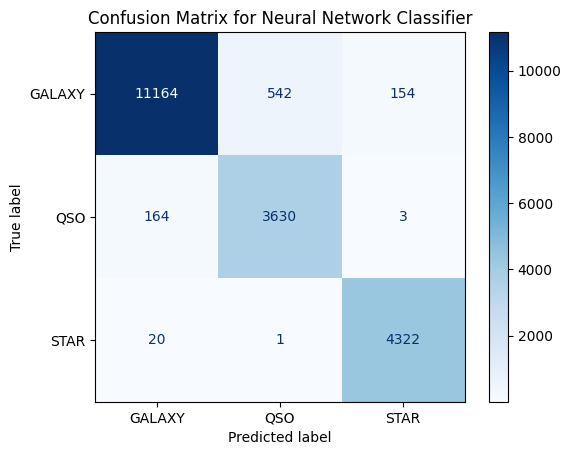

In [21]:
model.eval()

y_pred_nn = []
y_true_nn = []

with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)

        y_pred_nn.extend(predicted.cpu().numpy())
        y_true_nn.extend(labels.cpu().numpy())

# Calculate evaluation metrics
accuracy_nn = accuracy_score(y_true_nn, y_pred_nn)
precision_nn = precision_score(y_true_nn, y_pred_nn, average='weighted')
recall_nn = recall_score(y_true_nn, y_pred_nn, average='weighted')
f1_nn = f1_score(y_true_nn, y_pred_nn, average='weighted')

print(f"\nNeural Network Model Performance:")
print(f"Accuracy: {accuracy_nn:.4f}")
print(f"Precision: {precision_nn:.4f}")
print(f"Recall: {recall_nn:.4f}")
print(f"F1-score: {f1_nn:.4f}")

# Generate and display confusion matrix
cm_nn = confusion_matrix(y_true_nn, y_pred_nn)

plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay.from_predictions(y_true_nn, y_pred_nn, display_labels=['GALAXY', 'QSO', 'STAR'], cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Neural Network Classifier')
plt.show()

## **Model Comparison and Conclusion**
### **Comparison of Evaluation Metrics**
Let's compare the performance metrics for both models:

**Decision Tree Classifier Performance:**
*   Accuracy: 0.9516
*   Precision: 0.9530
*   Recall: 0.9516
*   F1-score: 0.9521

**Neural Network Model Performance:**
*   Accuracy: 0.9617
*   Precision: 0.9625
*   Recall: 0.9617
*   F1-score: 0.9618

**Analysis:**

From the metrics, the **Neural Network** model consistently performed slightly better across all evaluated metrics.